In [1]:
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple
import json
import csv
import sklearn

In [2]:
def load_corpus(file_path: str) -> Dict[str, Dict]:
    data = {}
    with open(file_path, 'r', encoding = "utf-8") as f:
        for line in f:
            obj = json.loads(line)
            data[obj["_id"]] = obj
    return data

In [3]:
def load_queries(file_path: str) -> Dict[str, Dict]:
    data = {}
    with open(file_path, 'r', encoding = "UTF-8") as f:
        for line in f:
            obj = json.loads(line)
            data[obj["_id"]] = obj
    return data

In [4]:
def load_qrels(file_path: str) -> Dict[str, Dict[str, int]]:
    """
    Load relevance judgments from a TSV file.
    Returns:
        Dict[query_id][doc_id] = relevance
    """
    qrels = {}

    with open(file_path, "r", encoding="utf-8") as f:
        reader = csv.DictReader(f, delimiter="\t")
        
        for row in reader:
            qid = row["query-id"]
            docid = row["corpus-id"]
            rel = int(row["score"])

            if qid not in qrels:
                qrels[qid] = {}

            qrels[qid][docid] = rel

    return qrels

In [5]:
# Load the dataset
print("Loading dataset...")
corpus = load_corpus('data\\dataset_be2\\corpus.jsonl')
queries = load_queries('data\\dataset_be2\\queries.jsonl')
qrels_valid = load_qrels('data\\dataset_be2\\valid.tsv')

print(f"Loaded {len(corpus)} documents in corpus")
print(f"Loaded {len(queries)} queries")
print(f"Loaded relevance for {len(qrels_valid)} queries (dataset)")

Loading dataset...
Loaded 25657 documents in corpus
Loaded 1000 queries
Loaded relevance for 700 queries (dataset)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus["title"] for corpus in corpus.values())
text_data = vectorizer.get_feature_names_out()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=20000,
    stop_words='english',
    min_df=2,
    max_df=0.8,
    token_pattern=r'\b[a-zA-Z]{2,}\b'
)

# Transforme le corpus en liste de titres
titles = [c["title"] for c in corpus.values()]
X = vectorizer.fit_transform(titles)

# Récupère les termes
terms = vectorizer.get_feature_names_out()

based 463.9507351951897
using 440.43235485562803
learning 426.6728507040354
data 323.1925017419789
networks 312.7202385225796
analysis 286.46660777674055
detection 282.3856747558566
neural 259.368885206104
deep 231.3561077931852
recognition 218.1202916002118
network 213.5079299850023
systems 207.76454353683147
model 205.77561363242685
approach 194.58268937877205
design 190.33447326259238
image 186.4175155523092
classification 185.06879545305404
multi 163.3010863574294
review 161.25849557680297
social 160.86231766375255


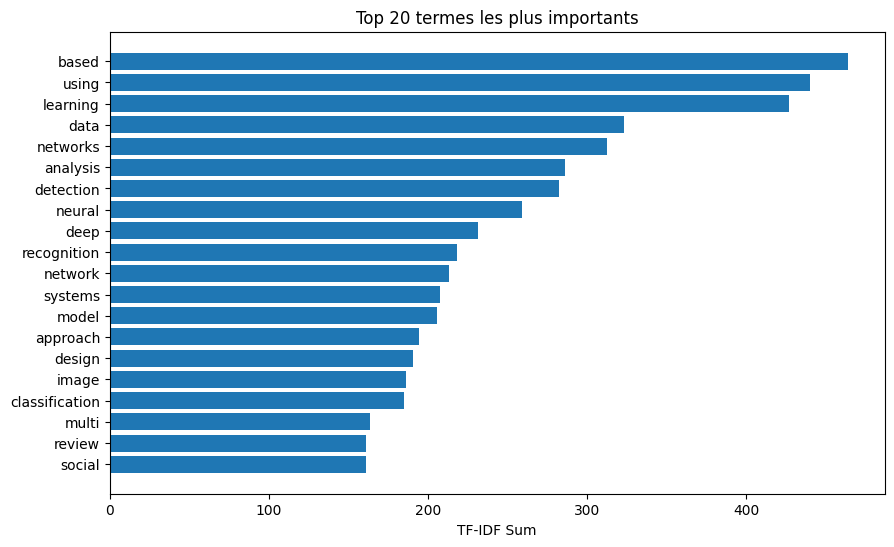

In [9]:
import numpy as np

# Somme TF-IDF par mot
term_sums = np.array(X.sum(axis=0)).flatten()

# Dictionnaire mot → importance
term_distribution = dict(zip(terms, term_sums))

# Tri des mots les plus importants
sorted_terms = sorted(term_distribution.items(), key=lambda x: x[1], reverse=True)

# Affiche les 20 premiers
for term, score in sorted_terms[:20]:
    print(term, score)

import matplotlib.pyplot as plt

top_n = 20
top_terms = sorted_terms[:top_n]
words, scores = zip(*top_terms)

plt.figure(figsize=(10,6))
plt.barh(words[::-1], scores[::-1])
plt.xlabel("TF-IDF Sum")
plt.title("Top 20 termes les plus importants")
plt.show()